# Introducción a Python para ciencias e ingenierías (clase 8)


Ing. Martín Gaitán

- Email: gaitan@gmail.com


## Seaborn

Antes de empezar con pandas vamos a configurar [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/index.html), un paquete que, entre otras cosas, mejora la estética de gráficos de matplotlib

Para instalar, como casi siempre

    conda install seaborn
      
o 

    pip install seaborn
    

Veamos un gráfico default generado por matplotlib

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

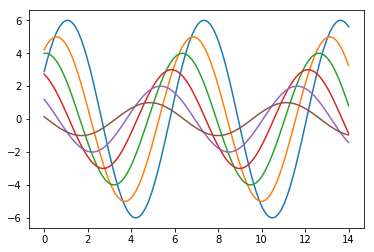

In [3]:
def sinplot():
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i))
        
sinplot()

/home/tin/.virtualenvs/curso/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


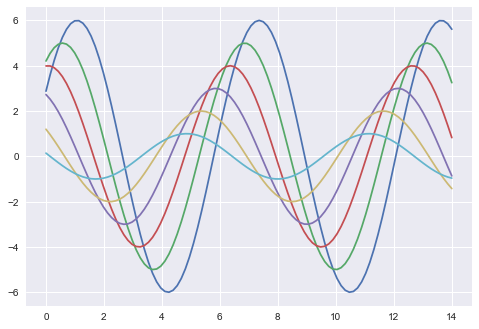

In [4]:
import seaborn as sns   # magia !
sinplot()

Seaborn permite configurar paletas, estilos de una manera muy fácil, globalmente o para un gráfico en particular

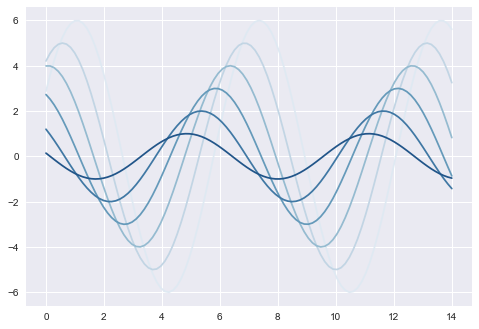

In [5]:
with sns.color_palette("Blues", desat=.7):
    sinplot()

Al ser un paquete especialmente diseñado para **estadística**, además de gráficos más lindos, tiene **gráficos especiales** e incorpora "datesets" de prueba

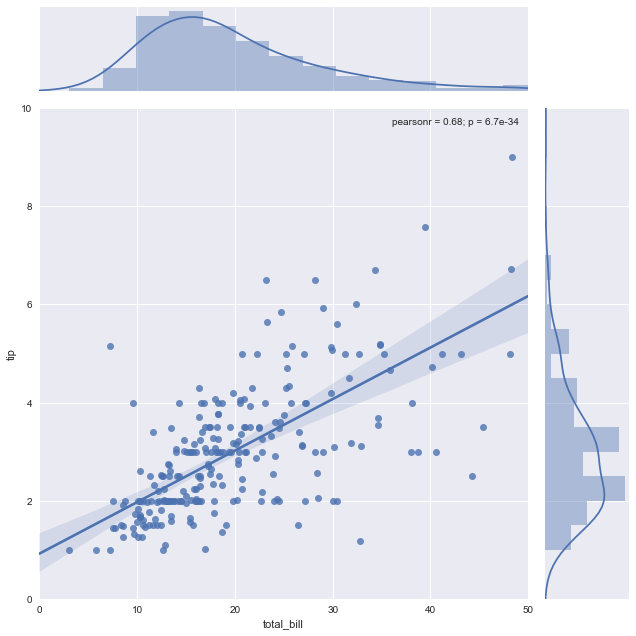

In [6]:
tips = sns.load_dataset("tips")
g = sns.jointplot("total_bill", "tip", data=tips, kind="reg", xlim=(0, 50), ylim=(0, 10), size=9)


¿Y qué ese dataset? Veamos

In [8]:
type(tips)

pandas.core.frame.DataFrame


## Pandas


[Pandas](http://pandas.pydata.org) es una biblioteca para manipulación y análisis de datos basada en Numpy. Aporta nuevas estructuras de datos de alto nivel que extienden datos almacenados en arrays, aportando más semántica y nuevas operaciones. 

Puede pensarse a Pandas como un **reemplazo pythonico a excel**


Pandas introduce dos estructuras de datos principales: `Series` y `DataFrame`.  


In [7]:
import pandas as pd

### Series

Un Series es un objeto **unidemensional**, similar a un array, una lista o una columna en una tabla, que tiene **asociado una etiqueta** para cada elemento. Por defecto, esta etiqueta es un número de 0 a N

In [8]:
s = pd.Series([1,3,5,np.nan,6,8]) # creamos una serie, analogo a un array de 1D
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [9]:
pd.Series?

Como vemos, es simplemente un envoltorio más lindo: el verdadero contenedor es un array de numpy

In [10]:
s.values

array([  1.,   3.,   5.,  nan,   6.,   8.])

In [11]:
s.values.ndim, s.values.shape

(1, (6,))

También podemos ver que nos generó el **indice** con claves default. 

In [12]:
s.index

RangeIndex(start=0, stop=6, step=1)

In [16]:
s.keys

<bound method Series.keys of 0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64>

Por eso, la manera más genérica y recomendada para indizar elementos es usar el `.ix`

In [23]:
s.ix[-1:3]

0    1.0
1    3.0
2    5.0
3    NaN
dtype: float64

¿Pero entonces una Serie es un array?. Bueno, en realidad es más parecido a un diccionario ordenado

In [24]:
s[-1]

KeyError: -1

In [25]:
s.ix[-1]

KeyError: -1

Hay muchas operaciones que podemos hacer sobre una serie.

In [26]:
s.mean(), s.sum(), s.std()

(4.5999999999999996, 23.0, 2.7018512172212592)

E incluso ver un resumen general de los datos

In [27]:
s.describe()

count    5.000000
mean     4.600000
std      2.701851
min      1.000000
25%      3.000000
50%      5.000000
75%      6.000000
max      8.000000
dtype: float64

Como vemos, es un poco más permisivo que Numpy con los datos faltantes (ese `nan` que hay por allí)

In [28]:
s.values.mean(), s.values.sum(), s.values.std()

(nan, nan, nan)

Y hay operaciones que no están disponibles en numpy o se comportan distinto

In [29]:
s.median()

5.0

In [30]:
s.values.median() # np.median(s.values)

AttributeError: 'numpy.ndarray' object has no attribute 'median'

Pandas es una herramienta nacida en la industria de las finanzas, y por ello intenta hacer fácil las cosas tipicas. Una de ellas es **graficar datos**. Utiliza **matplotlib** por default

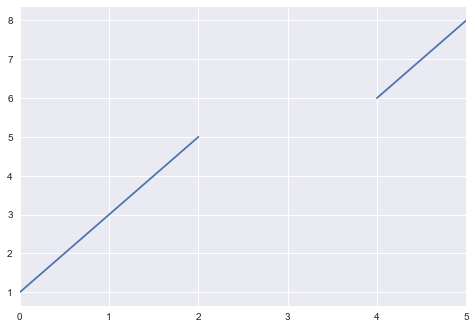

In [30]:
s.plot()

Como dijimos, los valores de una serie tienen una etiqueta y se pueden definir explicitamente

In [37]:
goles = pd.Series([10, 54, 31, 0], index=['gaitan', 'messi', 'suarez', 'ronaldo'])
goles

gaitan     10
messi      54
suarez     31
ronaldo     0
dtype: int64

Cuando el índice no es de enteros, se puede buscar un valor tanto por clave como por posición (con reglas de slicing)

In [38]:
goles['messi']

54

In [39]:
goles[-1]

0

In [41]:
goles.ix[1:-1]

messi     54
suarez    31
dtype: int64

Obviamente, dado que se trata de claves y valores, se puede instanciar una serie directamente desde un diccionario. 



In [43]:
pd.Series({'gaitan': 80, 'messi': 100})

gaitan     80
messi     100
dtype: int64

Pero a diferencia de un diccionario, las etiquetas se pueden repetir. Es decir que pueden haber multiples valores para una clave

In [46]:
s = pd.Series(np.random.rand(4) * 100, ['gaitan', 'messi', 'maradona', 'messi'])
s['messi']

messi     6.814979
messi    27.762713
dtype: float64

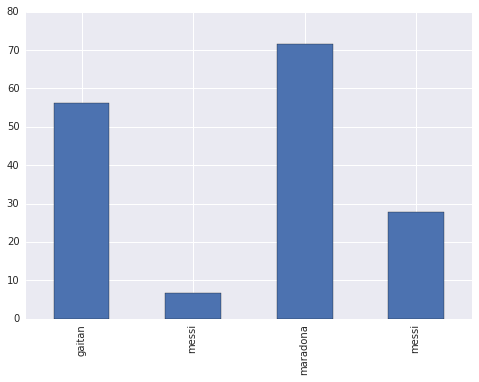

In [47]:
s.plot('bar')

La series se utilizan mucho para representar datos en **función del tiempo**. Hay una función especial análoga a `range()` que permite generar índices temporales

In [31]:
pd.date_range('1/1/2010', periods=1000)

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2012-09-17', '2012-09-18', '2012-09-19', '2012-09-20',
               '2012-09-21', '2012-09-22', '2012-09-23', '2012-09-24',
               '2012-09-25', '2012-09-26'],
              dtype='datetime64[ns]', length=1000, freq='D')

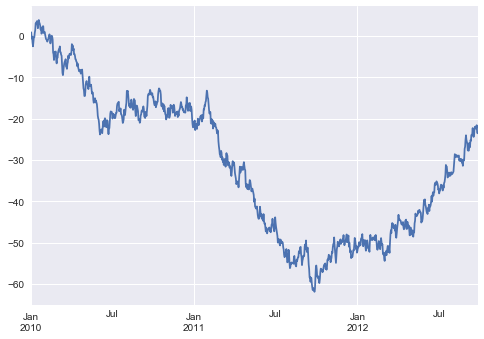

In [32]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2010', periods=1000))
ts = ts.cumsum()
ts.plot()

### Dataframe

Un DataFrame es una estructura tabular de **filas y columnas** (¡como una hoja de cálculo!). También se puede pensar un DataFrame como un conjunto de Series que comparten el índice (es decir, la primera columna)

In [33]:
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=list('ABCD'))
df.head()

,A,B,C,D
2010-01-01,-1.536303,-0.686149,0.359030,1.810788
2010-01-02,-0.357695,-0.952089,-0.525806,1.960201
2010-01-03,-0.419310,-1.484320,-1.296897,-0.536892
2010-01-04,0.297675,-1.988424,0.417766,-1.207143
2010-01-05,1.001379,-0.384861,1.073841,-0.524555


In [34]:
df.tail()

,A,B,C,D
2012-09-22,0.355165,-1.717212,0.683035,-0.413115
2012-09-23,0.399204,0.170302,-1.953205,0.514796
2012-09-24,-0.326344,1.741530,0.737105,-0.557197
2012-09-25,2.254474,0.570247,-0.162486,-0.795563
2012-09-26,0.368155,-0.349530,-1.568959,0.190495


Las columnas son Series!

In [35]:
type(df.A)

pandas.core.series.Series

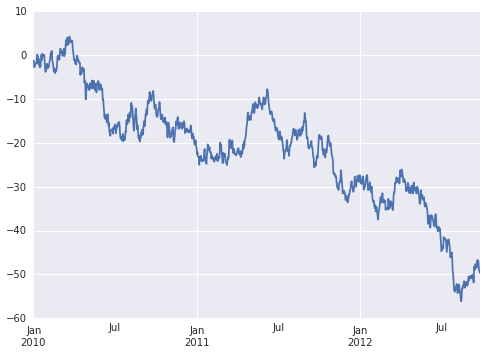

In [62]:
df["A"].cumsum().plot()

Se puede instanciar un DataFrame a partir de un diccionario. 

In [36]:
df2 = pd.DataFrame({ 'A': 1.,
                     'B': pd.Timestamp('20130102'),
                     'C': pd.Series(1, index=range(4),dtype='float32'),
                     'D': np.array([3, 2, 1, .9]),
                     'E': 'foo' })
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,3.0,foo
1,1.0,2013-01-02,1.0,2.0,foo
2,1.0,2013-01-02,1.0,1.0,foo
3,1.0,2013-01-02,1.0,0.9,foo


In [37]:
df2[['B','C']]

,B,C
0,2013-01-02,1.0
1,2013-01-02,1.0
2,2013-01-02,1.0
3,2013-01-02,1.0


In [38]:
import pickle

pickle.loads(pickle.dumps(df2))

,A,B,C,D,E
0,1.0,2013-01-02,1.0,3.0,foo
1,1.0,2013-01-02,1.0,2.0,foo
2,1.0,2013-01-02,1.0,1.0,foo
3,1.0,2013-01-02,1.0,0.9,foo


Pandas tambien puede importar archivos CSV o Excel, locales o remotos. Por ejemplo este [dataset](https://github.com/rjtavares/football-crunching/blob/master/datasets/cl-shots-2012.csv) de remates al arco en la Champions League

In [39]:
url = 'https://raw.githubusercontent.com/rjtavares/football-crunching/master/datasets/cl-shots-2012.csv'
shots = pd.read_csv(url, index_col=0, na_values='N/A')

In [40]:
shots.columns

Index(['dist', 'dx', 'dy', 'event_id', 'goal', 'play_id', 'player', 'shot',
       'team', 'x', 'y'],
      dtype='object')

In [41]:
shots.head()

,dist,dx,dy,event_id,goal,play_id,player,shot,team,x,y
0,28.989564,28.245,6.528,4fc58cdd-544b-4c05-8b2f-1cdc3d5a8164,False,699caaab-f4d6-411c-b7ef-737ec6d23196,James Rodríguez,True,Porto,76.755,28.832
2,19.254175,-18.585,5.032,764b87c7-426b-45da-9921-9e0556b90922,False,373c02f2-81ff-4b46-b2df-16629800c8fb,Sammir,True,Dinamo Zagreb,18.585,27.404
8,25.772814,-20.790,-15.232,a276c188-492e-4ada-8168-5bee7e998cc7,False,e190760e-9912-4d36-99f7-a1ceb696b5da,Duje Čop,True,Dinamo Zagreb,20.790,48.280
10,35.180567,33.810,-9.724,b5f9dd79-14ff-4671-ad3a-a198abfa24a8,False,1204aee1-6925-48b1-92af-d70fa87b888f,Maicon,True,Porto,71.190,44.200
12,13.755000,13.755,0.000,3a0178d9-67c8-4018-b18e-cceb3fbbdf48,False,a968c9e5-6f17-48ab-9081-7210ce10b3ed,Miguel Lopes,True,Porto,91.245,38.012


Podemos filtrar el dataset por múltiples criterios. Por ejemplo, para calcular la distancia promedio de los goles que hizo el genio:

In [42]:
shots[(shots.player == 'Lionel Messi') & shots.goal].dist.mean()

10.951773001848336

Podemos separar subconjuntos basado en uno o más criterios

In [43]:
shots.groupby('team').describe()

dist                                                        \
                  count       mean        std       min        25%        50%   
team                                                                            
Ajax               51.0  19.386078   7.300035  4.085401  13.722455  20.317035   
Anderlecht         37.0  18.542860   7.971910  6.424019  12.498227  16.192901   
Arsenal            37.0  15.050964   6.232507  5.273269  10.322907  14.766801   
BATE               49.0  20.173918   8.508928  6.826355  13.439592  17.661409   
Barcelona         118.0  17.149734   7.541686  4.261234  10.554698  16.266352   
Bayern            128.0  17.517833   8.159604  0.000000  11.213396  17.042660   
Benfica            74.0  19.007116   7.869186  4.922845  12.452546  19.879145   
Braga              69.0  18.941317   9.082840  3.796599  11.155296  17.709284   
CFR Cluj           45.0  20.795136  11.522079  4.328055  11.510186  17.054152   
Celtic             57.0  19.422191   9.324724  2.584000  11.534265  18.101430   
Chelsea            64.0  16.749424   8.089951  1.840361  10.857455  16.038476   
Dinamo Zagreb      30.0  19.756942   8.474091  5.698686  11.484111  19.216867   
Dortmund          138.0  18.099782   7.413309  5.560040  12.214629  16.563488   
Dynamo Kyiv        50.0  19.943924   8.295395  5.443827  11.806465  20.258975   
Galatasaray        91.0  19.493112   8.267951  5.661238  12.888909  18.291736   
Juventus          118.0  18.029021   7.710819  2.176000  12.527100  17.094019   
LOSC               57.0  20.661852   7.298055  6.001171  14.357041  20.940939   
Man. City          53.0  16.032345   7.927974  3.527694  11.066026  13.404709   
Man. United        87.0  15.808515   7.746846  3.964089   9.829987  13.676495   
Milan              67.0  18.183003   7.807676  2.680616  12.682053  18.175968   
Montpellier        53.0  23.653237   8.926125  3.465000  16.813756  23.417468   
Málaga             68.0  17.683059   7.735159  1.289024  11.293821  17.009160   
Nordsjælland       31.0  20.345961   9.752031  3.992317  12.014537  19.543468   
Olympiacos         50.0  19.001173   7.989388  4.797256  12.854162  16.977733   
PSG               106.0  16.955020   6.969359  3.624803  11.366603  16.614551   
Porto              69.0  18.397419   6.664212  3.752497  14.007318  17.248097   
Real Madrid       166.0  18.082265   8.231794  0.000000  11.079421  18.282674   
Schalke            75.0  18.570815   7.851050  5.329180  12.481424  17.548985   
Shakhtar Donetsk   67.0  18.829678   9.676831  5.056374  12.339711  17.686763   
Spartak Moskva     43.0  17.761703   7.484024  3.150000  12.750133  17.620498   
Valencia           64.0  18.669912   7.497609  7.771786  13.374904  16.558904   
Zenit              61.0  18.893458   7.615732  4.330330  13.187103  18.807891   

                                           dx             ...           x  \
                        75%        max  count      mean   ...         75%   
team                                                      ...               
Ajax              25.228054  33.838975   51.0  5.252059   ...    91.14000   
Anderlecht        26.684157  34.941322   37.0 -0.805946   ...    90.72000   
Arsenal           19.390594  26.889665   37.0  0.175946   ...    93.97500   
BATE              27.055201  43.293600   49.0 -4.735714   ...    87.57000   
Barcelona         22.695007  41.683173  118.0  0.460042   ...    90.82500   
Bayern            23.029633  44.005908  127.0  2.149606   ...    94.02750   
Benfica           24.552495  36.973481   74.0  0.151824   ...    86.49375   
Braga             25.772078  36.081930   69.0  1.387826   ...    89.46000   
CFR Cluj          28.336787  54.922115   45.0  4.022667   ...    92.92500   
Celtic            27.348737  48.384144   57.0  0.116053   ...    87.57000   
Chelsea           21.720067  40.794737   64.0 -1.847344   ...    92.71500   
Dinamo Zagreb     26.198767  34.638485   30.0  3.027500   ...    92.45250   
Dortmund          23.208222 

In [44]:
shots.groupby(['team', 'goal']).dist.mean()

team              goal 
Ajax              False    20.321821
                  True     13.504265
Anderlecht        False    19.198889
                  True     13.130618
Arsenal           False    16.474430
                  True     10.622403
BATE              False    20.809256
                  True     17.350193
Barcelona         False    17.686370
                  True     13.163291
Bayern            False    18.953692
                  True     12.146656
Benfica           False    19.661054
                  True      9.982772
Braga             False    19.871390
                  True     10.703532
CFR Cluj          False    21.967072
                  True     15.374932
Celtic            False    20.581338
                  True     12.322416
Chelsea           False    17.485217
                  True     14.345834
Dinamo Zagreb     False    20.047741
                  True     11.323766
Dortmund          False    19.511815
                  True     11.039619
Dynamo Kyiv   

Una alternativa aún más poderosa es hacer un pivot de datos, donde se definen una o múltples filas y columnas para agrupar datos, y la dimesiones ('values') que se quieren ver resumidas. La función de agregación por defecto es `np.mean`

In [45]:
pt1 = pd.pivot_table(shots, index=['team'], columns=['goal'], values=['dist'])
pt1

dist           
goal                  False      True 
team                                  
Ajax              20.321821  13.504265
Anderlecht        19.198889  13.130618
Arsenal           16.474430  10.622403
BATE              20.809256  17.350193
Barcelona         17.686370  13.163291
Bayern            18.953692  12.146656
Benfica           19.661054   9.982772
Braga             19.871390  10.703532
CFR Cluj          21.967072  15.374932
Celtic            20.581338  12.322416
Chelsea           17.485217  14.345834
Dinamo Zagreb     20.047741  11.323766
Dortmund          19.511815  11.039619
Dynamo Kyiv       20.660831  13.491763
Galatasaray       20.462527  11.640850
Juventus          18.859114  12.737179
LOSC              21.062201  13.455570
Man. City         15.783804  17.665613
Man. United       16.475926  10.669451
Milan             18.659194  13.341725
Montpellier       24.754086  15.029924
Málaga            18.622637  14.058971
Nordsjælland      21.450126  12.892849
Olympiacos        20.608253  11.680029
PSG               18.066634  12.175081
Porto             19.192670  13.705443
Real Madrid       18.843789  13.981747
Schalke           19.267595  14.041746
Shakhtar Donetsk  19.878827  14.021079
Spartak Moskva    18.694015  10.676129
Valencia          20.009240  13.886594
Zenit             19.820624  10.394430

como siempre, podemos graficar

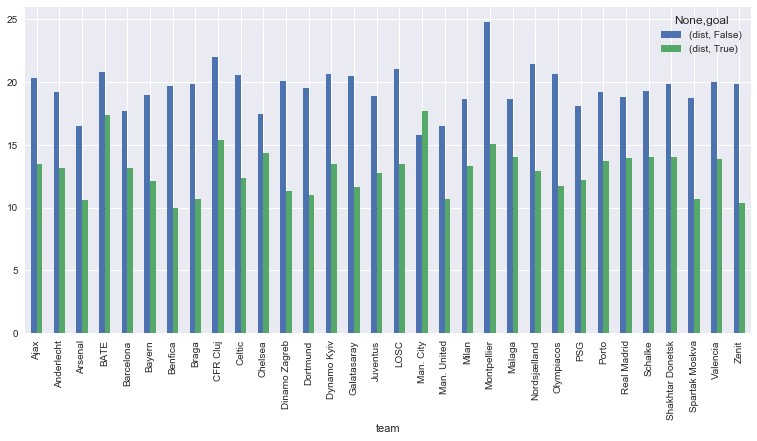

In [46]:
pt1.plot(kind='bar', figsize=(13,6))

En los dataframes resultantes de un pivot, índice y claves no son lo mismo

In [47]:
pt1.index is pt1.keys()

False

Entonces esto no funciona

In [48]:
pt1['Barcelona']

KeyError: 'Barcelona'

In [92]:
pt2 = pd.pivot_table(shots, index=['team', 'player'], columns=['goal'], values=['dist'])
pt2

dist           
goal                                        False      True 
team           player                                       
Ajax           Christian Eriksen        22.917869  20.386337
               Daley Blind              17.560331        NaN
               Daniel Hoesen            11.153286  21.340401
               Derk Boerrigter          21.101901  18.931250
               Jody Lukoki              22.134413        NaN
               Lasse Schøne             25.664372        NaN
               Niklas Moisander          8.951737  10.126408
               Ricardo van Rhijn        18.820696        NaN
               Ryan Babel               21.957276        NaN
               Siem de Jong             22.246804   6.809526
               Tobias Sana              16.238031        NaN
               Viktor Fischer           18.146298        NaN
Anderlecht     Cheikhou Kouyaté         30.318649        NaN
               Dennis Praet             21.446210        NaN
               Dieudonné Mbokani        19.764263  14.005145
               Guillaume Gillet         13.908516        NaN
               Kanu                     22.545872        NaN
               Lucas Biglia             19.917420        NaN
               Marcin Wasilewski         9.912763        NaN
               Massimo Bruno            14.733733        NaN
               Milan Jovanović          20.431687  18.088162
               Olexandr Yakovenko       22.839317        NaN
               Olivier Deschacht         9.851069        NaN
               Sacha Kljestan           26.612876        NaN
               Tom De Sutter            14.062380   6.424019
Arsenal        Aaron Ramsey             24.900117  12.822007
               Alex Oxlade-Chamberlain  21.432514        NaN
               Andrey Arshavin          15.469432        NaN
               Gervinho                 12.983576   5.273269
               Jack Wilshere                  NaN   7.715528
...                                           ...        ...
Spartak Moskva Kirill Kombarov          36.071434        NaN
               Marek Suchý              13.783557        NaN
               Nicolas Pareja           17.857045        NaN
               Rafael Carioca                 NaN  10.620419
               Romulo                   20.316394  14.135129
               Welliton                 18.092743        NaN
Valencia       Adil Rami                16.901760  11.655198
               Andrés Guardado          18.027033        NaN
               Daniel Parejo            34.346378        NaN
               David Albelda            37.068992        NaN
               Fernando Gago            24.625403        NaN
               Jonas                    18.068141  16.828963
               Nelson Valdez            13.976845   9.071122
               Ricardo Costa             8.402404        NaN
               Roberto Soldado          15.854446  11.219796
               Sofiane Feghouli         18.233322  14.887335
               Tino Costa               28.166059        NaN
               Éver Banega              18.927973        NaN
Zenit          Aleksandr Kerzhakov      18.129066  11.478895
               Axel Witsel              20.134777        NaN
               Danny                    12.416504   9.025218
               Domenico Criscito        30.378758        NaN
               Hulk                     23.162441   9.308568
               Igor Denisov             20.440771        NaN
               Nicolas Lombaerts         9.647090        NaN
               Roman Shirokov           19.396145   7.225680
               Sergei Semak             21.584877        NaN
               Tomáš Hubočan            12.783965        NaN
               Viktor Fayzulin          28.379789  16.303000
               Vladimir Bystrov         20.214203        NaN

[468 rows x 2 columns]

In [50]:
pt1.loc['Barcelona']

      goal 
dist  False    17.686370
      True     13.163291
Name: Barcelona, dtype: float64

Las tablas pivoteantes son mucho más poderosas

In [52]:
pt2 = pd.pivot_table(shots, index=['team', 'player'], columns=['goal'], values=['dist', 'x', 'y'])
pt2

dist                     x  \
goal                                        False      True       False   
team           player                                                     
Ajax           Christian Eriksen        22.917869  20.386337  63.000000   
               Daley Blind              17.560331        NaN  92.610000   
               Daniel Hoesen            11.153286  21.340401  95.917500   
               Derk Boerrigter          21.101901  18.931250  65.555000   
               Jody Lukoki              22.134413        NaN  85.050000   
               Lasse Schøne             25.664372        NaN  56.017500   
               Niklas Moisander          8.951737  10.126408   7.665000   
               Ricardo van Rhijn        18.820696        NaN  49.350000   
               Ryan Babel               21.957276        NaN  77.542500   
               Siem de Jong             22.246804   6.809526  57.244091   
               Tobias Sana              16.238031        NaN  89.040000   
               Viktor Fischer           18.146298        NaN  69.772500   
Anderlecht     Cheikhou Kouyaté         30.318649        NaN  30.135000   
               Dennis Praet             21.446210        NaN  21.000000   
               Dieudonné Mbokani        19.764263  14.005145  62.965000   
               Guillaume Gillet         13.908516        NaN  56.448000   
               Kanu                     22.545872        NaN  57.162000   
               Lucas Biglia             19.917420        NaN  65.887500   
               Marcin Wasilewski         9.912763        NaN   6.352500   
               Massimo Bruno            14.733733        NaN  94.500000   
               Milan Jovanović          20.431687  18.088162  57.945000   
               Olexandr Yakovenko       22.839317        NaN  21.420000   
               Olivier Deschacht         9.851069        NaN  97.335000   
               Sacha Kljestan           26.612876        NaN  22.627500   
               Tom De Sutter            14.062380   6.424019  11.865000   
Arsenal        Aaron Ramsey             24.900117  12.822007  11.340000   
               Alex Oxlade-Chamberlain  21.432514        NaN  84.000000   
               Andrey Arshavin          15.469432        NaN  94.290000   
               Gervinho                 12.983576   5.273269  54.390000   
               Jack Wilshere                  NaN   7.715528        NaN   
...                                           ...        ...        ...   
Spartak Moskva Kirill Kombarov          36.071434        NaN  34.755000   
               Marek Suchý              13.783557        NaN   9.345000   
               Nicolas Pareja           17.857045        NaN  16.380000   
               Rafael Carioca                 NaN  10.620419        NaN   
               Romulo                   20.316394  14.135129  84.840000   
               Welliton                 18.092743        NaN  86.940000   
Valencia       Adil Rami                16.901760  11.655198  49.087500   
               Andrés Guardado          18.027033        NaN  63.147000   
               Daniel Parejo            34.346378        NaN  34.335000   
               David Albelda            37.068992        NaN  67.935000   
               Fernando Gago            24.625403        NaN  80.377500   
               Jonas                    18.068141  16.828963  82.385625   
               Nelson Valdez            13.976845   9.071122   8.225000   
               Ricardo Costa             8.402404        NaN   7.455000   
               Roberto Soldado          15.854446  11.219796  52.955000   
               Sofiane Feghouli         18.233322  14.887335  63.735000   
               Tino Costa               28.166059        NaN  43.715000   
               Éver Banega              18.927973        NaN  86.310000   
Zenit          Aleksandr Kerzhakov      18.129066  11.478895  37.666364   
               Axel Witsel              20.134777        NaN  86.48500

Notar que en este caso usamos un índice compuesto (team-player). Esto hace que el dataframe utilice un tipo de índice especial llamado `MultiIndex`

In [53]:
pt2.loc['Barcelona']

dist                     x                   y        
goal                  False      True       False    True       False   True 
player                                                                       
Adriano           25.493844        NaN  47.733000      NaN  34.476000     NaN
Alex Song          7.928566        NaN   6.667500      NaN  32.368000     NaN
Alexis Sánchez    13.244627   6.301468  51.043125  98.7000  39.856500  35.564
Andrés Iniesta    21.089408  10.040548  65.185909  95.6550  32.986182  41.004
Cesc Fàbregas     19.930224  17.711724  71.321250  10.2900  40.443000  45.832
Christian Tello         NaN  25.150836        NaN  87.0450        NaN  19.652
Daniel Alves      20.561624  20.567223  17.587500  87.6750  31.858000  41.888
David Villa       19.491869        NaN  53.917500      NaN  31.905600     NaN
Gerard Deulofeu   20.202206        NaN  19.530000      NaN  33.592000     NaN
Gerard Piqué       9.634535        NaN  96.390000      NaN  32.249000     NaN
Jordi Alba        31.893448  10.801282  21.000000   4.4100  52.632000  40.324
Lionel Messi      19.218590  10.951773  44.682273  65.3975  32.748182  33.728
Marc Bartra        9.377514        NaN  50.890000      NaN  31.665333     NaN
Pedro Rodríguez   15.128710  16.723390  47.517273  16.5900  33.598182  38.148
Sergio Busquets   15.455097        NaN  41.755000      NaN  41.162667     NaN
Thiago Alcántara   6.259553        NaN   5.670000      NaN  26.112000     NaN
Xavi Hernández    19.316458  11.278964  63.334091  11.0250  37.226909  34.000

Podemos conseguir la fila particular para un índice compuesto

In [54]:
pt2.loc[('Barcelona', 'Lionel Messi')]

      goal 
dist  False    19.218590
      True     10.951773
x     False    44.682273
      True     65.397500
y     False    32.748182
      True     33.728000
Name: (Barcelona, Lionel Messi), dtype: float64

Y ahora podemos volver al dataset `tips` importado de Seaborn

In [55]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [56]:
tips.pivot_table(index=['day', 'sex'], columns=['time', 'smoker'], values=['total_bill', 'tip'])

tip                               total_bill             \
time         Lunch              Dinner                Lunch              
smoker         Yes        No       Yes        No        Yes         No   
day  sex                                                                 
Thur Male    3.058  2.941500       NaN       NaN  19.171000  18.486500   
     Female  2.990  2.437083       NaN  3.000000  19.218571  15.899167   
Fri  Male    1.900       NaN  3.246000  2.500000  11.386667        NaN   
     Female  2.660  3.000000  2.700000  3.250000  13.260000  15.980000   
Sat  Male      NaN       NaN  2.879259  3.256563        NaN        NaN   
     Female    NaN       NaN  2.868667  2.724615        NaN        NaN   
Sun  Male      NaN       NaN  3.521333  3.115349        NaN        NaN   
     Female    NaN       NaN  3.500000  3.329286        NaN        NaN   

                                   
time            Dinner             
smoker             Yes         No  
day  sex                           
Thur Male          NaN        NaN  
     Female        NaN  18.780000  
Fri  Male    25.892000  17.475000  
     Female  12.200000  22.750000  
Sat  Male    21.837778  19.929063  
     Female  20.266667  19.003846  
Sun  Male    26.141333  20.403256  
     Female  16.540000  20.824286

Y ya que estamos, veamos los gráficos facetados

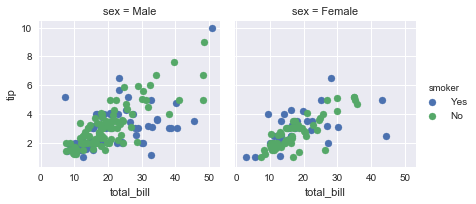

In [57]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip")
g.add_legend();

Pandas es una herramienta poderosísima y sólo vimos un poquito. ¡A estudiarlo!

------------

# Python es infinito: Instalando paquetes


Python es un lenguaje utilizado en muchísimas áreas. El repositorio donde se suelen compartir paquetes se llama PyPi, el Python Package Index. 

**Desafío**: elijan un tópico cualquiera y busquemos un paquete para instalar

In [62]:
from IPython.display import IFrame
IFrame('http://pypi.python.org/pypi', '100%', 400)

La herramienta oficial para instalar paquetes es [pip](https://pip.pypa.io/en/stable/). La forma canónica es

    pip install --user <nombre_paquete>

(el flag `--user` (opcional) instala el paquete a nivel usuario, sin requerir permisos de adminitracion)

In [102]:
!pip install --help


Usage:   
  pip install [options] <requirement specifier> ...
  pip install [options] -r <requirements file> ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

Description:
  Install packages from:
  
  - PyPI (and other indexes) using requirement specifiers.
  - VCS project urls.
  - Local project directories.
  - Local or remote source archives.
  
  pip also supports installing from "requirements files", which provide
  an easy way to specify a whole environment to be installed.

Install Options:
  -e, --editable <path/url>   Install a project in editable mode (i.e.
                              setuptools "develop mode") from a local project
                              path or a VCS url.
  -r, --requirement <file>    Install from the given requirements file. This
                              option can be used multiple times.
  -b, --build <dir>           Directory to unpac

Pip busca, baja, descomprime, e instala (y repite los pasos recursivamente para las dependencias). Por ejemplo, podemos instalar [pint](http://pint.readthedocs.org/en/0.6/tutorial.html), del amigo [Hernán Greco](http://www.conicet.gov.ar/hernan-grecco-la-alfabetizacion-cientifica-es-tan-importante-como-la-alfabetizacion-tradicional/)

(Nota: esto no va a funcionar en `try.jupyter.org` debido a las limitaciones de salida de red por cuestiones de seguridad)

In [106]:
!pip install pint

Downloading/unpacking pint
  Using download cache from /home/tin/.pip_download_cache/https%3A%2F%2Fpypi.python.org%2Fpackages%2Fsource%2FP%2FPint%2FPint-0.6.zip
  Running setup.py (path:/home/tin/.virtualenvs/curso/build/pint/setup.py) egg_info for package pint
    
    no previously-included directories found matching 'docs/_build'
    no previously-included directories found matching 'docs/_themes/.git'
  Running setup.py install for pint
    
    no previously-included directories found matching 'docs/_build'
    no previously-included directories found matching 'docs/_themes/.git'
Cleaning up...


In [108]:
import pint 
ur = pint.UnitRegistry()

In [109]:
vel = 60 * ur.km / ur.hr
vel

<Quantity(60.0, 'kilometer / hour')>

In [113]:
vel.to('m/s')

<Quantity(16.666666666666668, 'meter / second')>

Pero **¿dónde se instala un paquete?**. Si no le decimos lo contrario con algun parámetro del instalador, el paquete se descromprime y se copia a un directorio especial para Python llamado `site-packages`, que a su vez se encuentra en una **lista de directorios** (definida como una variable de entorno del sistema) en la que la maquinaria de importanción de Python busca paquetes

In [114]:
pint.__file__

'/home/tin/.virtualenvs/curso/lib/python3.4/site-packages/pint/__init__.py'

In [115]:
import sys
sys.path

['',
 '/home/tin/lab/curso-python-cientifico/test_pack',
 '/home/tin/.virtualenvs/curso/lib/python3.4',
 '/home/tin/.virtualenvs/curso/lib/python3.4/plat-x86_64-linux-gnu',
 '/home/tin/.virtualenvs/curso/lib/python3.4/lib-dynload',
 '/usr/lib/python3.4',
 '/usr/lib/python3.4/plat-x86_64-linux-gnu',
 '/home/tin/.virtualenvs/curso/lib/python3.4/site-packages',
 '/home/tin/.virtualenvs/curso/lib/python3.4/site-packages/IPython/extensions']

Para desintalar paquetes, el subcomando de pip es `uninstall`

In [116]:
!pip freeze

-f file:///home/tin/.pip_packages
Cython==0.22
Jinja2==2.7.3
MarkupSafe==0.23
Pint==0.6
Pygments==2.0.2
certifi==2015.04.28
folium==0.1.4
ipdb==0.8
ipython==3.1.0
jsonschema==2.4.0
llvmlite==0.5.0-0.g93a41b1.dirty
marquesina==0.3
matplotlib==1.4.3
mistune==0.5.1
mpld3==0.2
mpmath==0.19
nose==1.3.6
numba==0.18.2
numpy==1.9.2
pandas==0.16.0
poliastro==0.3.0
ptyprocess==0.4
pyparsing==2.0.3
python-dateutil==2.4.2
pytz==2015.2
pyzmq==14.6.0
scipy==0.15.1
seaborn==0.5.1
six==1.9.0
sympy==0.7.6
terminado==0.5
tornado==4.1
virtualenv==13.0.3


Notaron ese directorio ".virtualenvs" que se lee en mi sys.path?  Es que yo estoy usando un **entorno virtual**

### Entornos virtuales

Un entorno virtual (virtualenv) en python es una compartimentalización para tener multiples conjuntos de **dependencias por proyecto**, instalándolas en un directorio particular. Es decir, podemos tener un virtualenv en el que usamos numpy 1.8 y no vernos obligado a actualizarlo si comenzamos otro para el que necesitamos una feature que aparece en numpy 2.0. 

Python 3 incorpora built-in una herramienta llamada [pyenv](https://docs.python.org/3/library/venv.html) para manejar entornos virtuales, pero la forma canónica sigue siendo utilizar la herramienta [virtuelenv](https://virtualenv.pypa.io/en/latest/)

 

Primero instalamos virtualenv

        pip install virtualenv   #  o pip install --user virtualenv

Para crear un virtualenv basta usar 

    virtualenv <DIR>
    
Donde `<DIR>` es el directorio donde queremos instalar las dependencias exclusivas para nuestro proyecto. En mi caso es `~/.virtualenvs/curso`


Una vez creado un virtualenv, cada vez que se quiere usarlo hay que activarlo. En sistemas linux/mac:

    source <DIR>/bin/activate 
    
o en sistemas windows: 

    <DIR>\Scripts\activate

Cuando el virtualenv está activado, se denotará por un prefijo en el prompt. Luego, podemos instalar paquetes directamente via pip, sin permisos de adminitrador, ya que estamos instalando los paquetes en el `site-packages` definido dentro del virtualenv. 


Para facilitar la creacion y activacion de entronos con virtualenv se puede usar [virtualenvwrapper](https://virtualenvwrapper.readthedocs.org/en/latest/)

Para salir de un virtualenv (desactivarlo) se ejecuta

    deactivate

## Conda 

Un problema del tandem virtualenv-pip es que, en general, los paquetes instalables son archivos comprimidos de **código fuente**. Eso no es ningun problema cuando se trata de paquetes python puro, porque Python se interpreta y no se compila, pero cuando es un paquete que tiene dependencias externas (fortran, cython, c, etc.) o requiere dependencias complejas en el sistema operativo, la instalación via pip requerirá compilar, eso implica compiladores, headers y un montón de cosas que complican la vida (además de ser un proceso lento). 

Por eso la herramienta [conda](http://conda.pydata.org/), que viene preinstalada si usamos la distribución de python Anaconda, es muy interesante. En vez de bajar código fuente, baja paquetes precompilados (binarios) en un formato y desde un [repositorio especial](https://binstar.org/) (distinto a PyPi). 

Además, conda sabe crear por sí mismo entornos virtuales, es decir que es una mezcla entre virtualenv y pip. 


Para crear un entorno virtual via conda

    conda create -n <nombre_venv> <programas o paquetes basicos a instalar, opcionalmente con versiones>
    
Por ejemplo:

    conda create -n curso python=3.4 numpy scipy matplotlib pandas sympy seaborn ipython ipython-notebook

Para activar el entorno, es análogo a la manera de `virtualenv`

    source activate curso   
    
O en Windows, directamente 


    activate curso
    
Para instalar paquetes dentro del entorno, 

    conda install <paquetes o programas>
   


## Distribuyendo tus paquetes (o módulos)

Ya vimos algo de esto. Python usa un archivo especial llamado `setup.py` que invoca a una función llamada `setup()` con diversos parámetros que especifican de qué se trata el paquete, la versión, el autor, la lista explícita de  módulos y paquetes que debe incluir, etc.

Este *script* `setup.py` es llamado por python (directamente o a través de pip) y nos presenta una lista de subcomandos. 


Se nuevo sucede que Python trae incoporada lo necesario para escribir este archivo de setup, en el paquete `distutils` de la biblioteca estandar, pero la opción canónica superadora es usar el paquete [setuptools](https://setuptools.pypa.io/en/latest/index.html)


In [121]:
%cd ..

/home/tin/lab/curso-python-cientifico


In [122]:
%mkdir test_pack/
%mkdir test_pack/marquesina

In [123]:
%cd test_pack

/home/tin/lab/curso-python-cientifico/test_pack


In [124]:
%ls

marquesina/


Supongamos que queremos distribuir nuestra [función maquesina](https://gist.githubusercontent.com/mgaitan/6319640/raw/68d4fc1b55407ce9e358b6769699e536eed5a4e1/gistfile1.txt) de la clase 2. Vamos a crear un paquete. Como es  nuestro único código, lo podemos poner directamente en el `__init__.py` del proyecto

In [125]:
%%writefile marquesina/__init__.py

def marquesina(cadena, ancho=60, alto=1, caracter="*"):
    """
    Wraps ``cadena`` in a box of ``caracter`` symbols with padding ``ancho`` x ``alto``
    """
    
    cadena = cadena.center(ancho)
    cadena = caracter + cadena[1:-1] + caracter
    cadena += '\n'
    relleno = " " * ancho
    relleno = caracter + relleno[1:-1] + caracter
    relleno += '\n'
    tapa = caracter * ancho
    return tapa + '\n' + relleno * alto + cadena + relleno * alto + tapa



Writing marquesina/__init__.py


Sigiendo la [doc](https://setuptools.pypa.io/en/latest/setuptools.html), una versión mínima del `setup.py` se vería así

In [128]:
%%writefile setup.py
from setuptools import setup, find_packages

setup(
    name='marquesina',
    version = '0.1',
    description='Marquesina, decorate your text',
    long_description='A package with functions to decorate text',
    author='Martín Gaitán',
    author_email='curso@',
    packages = find_packages(), 
)

Overwriting setup.py


Así se ve el árbol de archivos

In [127]:
!tree

.
├── marquesina
│   └── __init__.py
└── setup.py

1 directory, 2 files


Nuestro `setup.py` es un programa de linea de comandos, con ayuda y todo!

In [132]:
!python setup.py install --help

Common commands: (see '--help-commands' for more)

  setup.py build      will build the package underneath 'build/'
  setup.py install    will install the package

Global options:
  --verbose (-v)  run verbosely (default)
  --quiet (-q)    run quietly (turns verbosity off)
  --dry-run (-n)  don't actually do anything
  --help (-h)     show detailed help message
  --no-user-cfg   ignore pydistutils.cfg in your home directory

Options for 'install' command:
  --prefix                             installation prefix
  --exec-prefix                        (Unix only) prefix for platform-
                                       specific files
  --home                               (Unix only) home directory to install
                                       under
  --install-base                       base installation directory (instead of
                                       --prefix or --home)
  --install-platbase                   base installation directory for
                        

Ahora podemos instalar nuestro paquete, por ejemplo via `pip install -e` que instala el paquete sin copiar los archivos a `site-packages`, permitiendo que si modificamos el código impacte automaticamente en la versión importable

In [133]:
!pip install -e .

Obtaining file:///home/tin/lab/curso-python-cientifico/test_pack
  Running setup.py (path:/home/tin/lab/curso-python-cientifico/test_pack/setup.py) egg_info for package from file:///home/tin/lab/curso-python-cientifico/test_pack
    
  Running setup.py develop for marquesina
    
    Creating /home/tin/.virtualenvs/curso/lib/python3.4/site-packages/marquesina.egg-link (link to .)
    marquesina 0.1 is already the active version in easy-install.pth
    
    Installed /home/tin/lab/curso-python-cientifico/test_pack
Cleaning up...


In [134]:
from marquesina import marquesina

In [135]:
print(marquesina('hola mundo'))

************************************************************
*                                                          *
*                        hola mundo                        *
*                                                          *
************************************************************


Supongamos que lanzamos una nueva versión que incopora otra función 

In [136]:
%%writefile -a marquesina/__init__.py

def boca():
    print(marquesina('¡Aguante Boca!'))


Appending to marquesina/__init__.py


No haría falta cambiar el `setup.py` para importar el paquete o sus funciones, pero podemos usar una funcionalidad de `setuptools` que permite convertir funciones en simples programas de línea de comando instalables. 

In [138]:
%%writefile setup.py
from setuptools import setup, find_packages

setup(
    name='marquesina',
    version = '0.2',
    description='Marquesina, decorate your text',
    author='Martín Gaitán',
    author_email='curso@',
    packages = find_packages(),    # ['marquesina']
    entry_points = {
        'console_scripts': [           # esto crear un script 'boquita'  que ejecuta marquesina.boca()
            'boquita = marquesina:boca',
        ]}
)

Overwriting setup.py


In [139]:
!pip install -e .

Obtaining file:///home/tin/lab/curso-python-cientifico/test_pack
  Running setup.py (path:/home/tin/lab/curso-python-cientifico/test_pack/setup.py) egg_info for package from file:///home/tin/lab/curso-python-cientifico/test_pack
    
  Running setup.py develop for marquesina
    
    Creating /home/tin/.virtualenvs/curso/lib/python3.4/site-packages/marquesina.egg-link (link to .)
    marquesina 0.2 is already the active version in easy-install.pth
    Installing boquita script to /home/tin/.virtualenvs/curso/bin
    
    Installed /home/tin/lab/curso-python-cientifico/test_pack
Cleaning up...


Entonces **boquita** ahora es un programa en nuestro sistema!

In [140]:
!boquita

************************************************************
*                                                          *
*                      ¡Aguante Boca!                      *
*                                                          *
************************************************************


Para escribir "scripts" de linea de comandos que reciban parámetros, se puede utilizar el paquete de las biblioteca estándar [argparse](https://docs.python.org/3.4/library/argparse.html) o bien usar [Docopt](http://docopt.org)

Vamos más allá

In [144]:
%%writefile marquesina/plot.py

import matplotlib.pyplot as plt

def marquesina_plt(text, x=5, y=2, text_size=80):
    """
    return create a matplotlib's Text instance of `text`
    """
    coef =  x/max(len(text), 6)
    plt.figure(figsize=(x/coef, y/coef))
    plt.tick_params(bottom=False, left=False, right=False, top=False, labelleft=False, labelbottom=False) 
    return plt.text(0.5, 0.5, text, size=text_size, ha="center", va="center")


Writing marquesina/plot.py


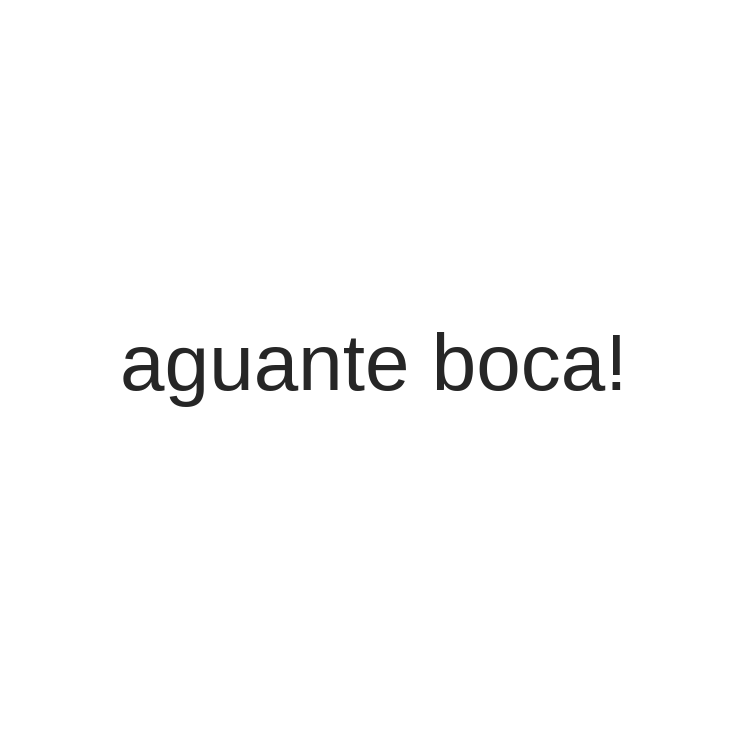

In [143]:

marquesina_plt('aguante boca!', x=2)

In [145]:
%%writefile setup.py
from setuptools import setup, find_packages

setup(
    name='marquesina',
    version = '0.3',
    description='Marquesina, decorate your text',
    author='Martín Gaitán',
    author_email='curso@',
    packages = find_packages(),    # ['marquesina']
    install_requires=['matplotlib'],
    entry_points = {
        'console_scripts': [           # esto crear un script 'boquita'  que ejecuta marquesina.boca()
            'boquita = marquesina:boca',
        ]}
)

Overwriting setup.py


In [146]:
!pip install -e .

Obtaining file:///home/tin/lab/curso-python-cientifico/test_pack
  Running setup.py (path:/home/tin/lab/curso-python-cientifico/test_pack/setup.py) egg_info for package from file:///home/tin/lab/curso-python-cientifico/test_pack
    
  Running setup.py develop for marquesina
    
    Creating /home/tin/.virtualenvs/curso/lib/python3.4/site-packages/marquesina.egg-link (link to .)
    marquesina 0.3 is already the active version in easy-install.pth
    Installing boquita script to /home/tin/.virtualenvs/curso/bin
    
    Installed /home/tin/lab/curso-python-cientifico/test_pack
Cleaning up...


In [1]:
from marquesina.plot import marquesina_plt

In [3]:
%cd test_pack/

/home/tin/lab/curso-python-cientifico/test_pack



Luego, podemos armar nuestro paquete distribuíble. Es un simple archivo comprimido con todo lo necesario

In [4]:
!python setup.py sdist

running sdist
running egg_info
writing entry points to marquesina.egg-info/entry_points.txt
writing requirements to marquesina.egg-info/requires.txt
writing marquesina.egg-info/PKG-INFO
writing dependency_links to marquesina.egg-info/dependency_links.txt
writing top-level names to marquesina.egg-info/top_level.txt
reading manifest file 'marquesina.egg-info/SOURCES.txt'
writing manifest file 'marquesina.egg-info/SOURCES.txt'

running check

creating marquesina-0.3
creating marquesina-0.3/marquesina
creating marquesina-0.3/marquesina.egg-info
making hard links in marquesina-0.3...
hard linking setup.py -> marquesina-0.3
hard linking marquesina/__init__.py -> marquesina-0.3/marquesina
hard linking marquesina/plot.py -> marquesina-0.3/marquesina
hard linking marquesina.egg-info/PKG-INFO -> marquesina-0.3/marquesina.egg-info
hard linking marquesina.egg-info/SOURCES.txt -> marquesina-0.3/marquesina.egg-info
hard linking marquesina.egg-info/dependency_links.txt -> marquesina-0.3/marquesina.eg

In [5]:
!ls dist

marquesina-0.3.tar.gz


Setuptools también sabe registrar y subir nuestro paquete a PyPi

    # solo hace falta hacerlo la primera vez
    python setup.py register
    
Luego cada vez que queramos publicar una nueva versión

    python setup.py sdist upload 


